In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

In [2]:
df = pd.read_csv('questions_data_clean_stopword_lemma_v3.csv')

In [3]:
df.head()

,Title,Description,Creation Time,Link,Clean_Text_Init,Clean_Text_Stopword,Clean_Text_Stopword_Lemma
0,Natural language date/time parser for .NET?,<p>Does anyone know of a .NET date/time parser...,22/08/2008 22:45,https://stackoverflow.com/questions/23689/natu...,natural language date time parser for net does...,natural language date time parser net anyone k...,natural language date time parser net anyone k...
1,Vista speech recognition in multiple languages,"<p>my primary language is spanish, but I use a...",31/08/2008 1:08,https://stackoverflow.com/questions/36533/vist...,vista speech recognition in multiple languages...,vista speech recognition multiple languages pr...,vista speech recognition multiple language pri...
2,How do you implement a &quot;Did you mean&quot;?,<blockquote>\n <p><strong>Possible Duplicate:...,3/09/2008 10:36,https://stackoverflow.com/questions/41424/how-...,how do you implement quot did you mean quot po...,implement quot mean quot possible duplicate su...,implement quot mean quot possible duplicate su...
3,Is there an algorithm that tells the semantic ...,"<p>input: phrase 1, phrase 2</p>\n\n<p>output:...",15/09/2008 12:26,https://stackoverflow.com/questions/62328/is-t...,is there an algorithm that tells the semantic ...,algorithm tells semantic similarity two phrase...,algorithm tell semantic similarity two phrase ...
4,How to read values from numbers written as words?,<p>As we all know numbers can be written eithe...,16/09/2008 7:47,https://stackoverflow.com/questions/70161/how-...,how to read values from numbers written as wor...,read values numbers written words know numbers...,read value number written word know number wri...


In [4]:
drop_cols = ['Clean_Text_Stopword', 'Clean_Text_Stopword_Lemma', 'Title', 'Description']
df = df.drop(drop_cols, axis='columns')

In [5]:
df.head()

,Creation Time,Link,Clean_Text_Init
0,22/08/2008 22:45,https://stackoverflow.com/questions/23689/natu...,natural language date time parser for net does...
1,31/08/2008 1:08,https://stackoverflow.com/questions/36533/vist...,vista speech recognition in multiple languages...
2,3/09/2008 10:36,https://stackoverflow.com/questions/41424/how-...,how do you implement quot did you mean quot po...
3,15/09/2008 12:26,https://stackoverflow.com/questions/62328/is-t...,is there an algorithm that tells the semantic ...
4,16/09/2008 7:47,https://stackoverflow.com/questions/70161/how-...,how to read values from numbers written as wor...


In [4]:
!pip install top2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [5]:
!pip uninstall -y numpy


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4


In [6]:
!pip install numpy==1.23.5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 44.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but

In [7]:
!pip install --force-reinstall top2vec[sentence_transformers]

  Using cached top2vec-1.0.36-py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.6 MB/s eta 0:00:00
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.5 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 6.2 MB/s eta 0:00:00
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 37.0 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_

In [6]:
from top2vec import Top2Vec

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [49]:
docs = df['Clean_Text_Init'].tolist()

In [50]:
len(docs)

23289

In [52]:
model = Top2Vec(docs,embedding_model='universal-sentence-encoder', ngram_vocab= True)

2025-04-22 06:12:57,615 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-04-22 06:13:23,297 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2025-04-22 06:13:40,296 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-04-22 06:14:03,446 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-04-22 06:14:25,088 - top2vec - INFO - Finding de

In [53]:
model.get_num_topics()

89

In [54]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [55]:
for num, size in zip(topic_nums, topic_sizes):
  print(num, ":", size)

0 : 1515
1 : 1201
2 : 987
3 : 953
4 : 765
5 : 736
6 : 680
7 : 671
8 : 619
9 : 580
10 : 525
11 : 519
12 : 464
13 : 452
14 : 419
15 : 411
16 : 396
17 : 386
18 : 369
19 : 355
20 : 353
21 : 339
22 : 332
23 : 324
24 : 323
25 : 320
26 : 317
27 : 305
28 : 294
29 : 294
30 : 285
31 : 276
32 : 272
33 : 255
34 : 239
35 : 203
36 : 196
37 : 191
38 : 191
39 : 180
40 : 163
41 : 153
42 : 151
43 : 146
44 : 146
45 : 145
46 : 144
47 : 143
48 : 143
49 : 138
50 : 137
51 : 136
52 : 135
53 : 131
54 : 126
55 : 122
56 : 117
57 : 111
58 : 108
59 : 107
60 : 105
61 : 104
62 : 98
63 : 98
64 : 92
65 : 91
66 : 90
67 : 87
68 : 87
69 : 86
70 : 85
71 : 84
72 : 82
73 : 82
74 : 79
75 : 77
76 : 75
77 : 73
78 : 63
79 : 57
80 : 56
81 : 55
82 : 50
83 : 45
84 : 42
85 : 42
86 : 42
87 : 37
88 : 31


In [56]:
topic_words, word_scores, topic_nums = model.get_topics()
for words, scores, num in zip(topic_words, word_scores, topic_nums):
  print("Topic Num:", num)
  print(f"Words: {words}")
  print("\n")

Topic Num: 0
Words: ['import nltk' 'installing nltk' 'importing nltk' 'error attributeerror'
 'install nltk' 'error valueerror' 'attributeerror module'
 'python wrapper' 'packages nltk' 'nltk download' 'nltk collocations'
 'error indexerror' 'attributeerror nonetype' 'error typeerror'
 'keras tokenizer' 'nltk pos_tag' 'importerror dll' 'nltk downloader'
 'python dist' 'typeerror traceback' 'python interpreter' 'python lib'
 'error traceback' 'attributeerror str' 'nltk book' 'lib python'
 'sklearn countvectorizer' 'nltk freqdist' 'spacy cli'
 'typeerror nonetype' 'sklearn tfidfvectorizer' 'attributeerror list'
 'tensorflow lib' 'nltk word_tokenize' 'valueerror setting'
 'virtualenv lib' 'tensorflow tutorial' 'pyspark dataframe'
 'conda install' 'tensorflow keras' 'packages sklearn' 'python exe'
 'scipy sparse' 'importerror no' 'cython blis' 'typeerror object'
 'pip install' 'nltk cookbook' 'kwargs file' 'keras embedding']


Topic Num: 1
Words: ['txt file' 'sed command' 'sed awk' 'newlin

In [64]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

Reducing topics: 100%|██████████| 69/69 [00:09<00:00,  6.97it/s]


In [65]:
topic_mapping[1]

[87, 0]

In [66]:
for i in range(20):
  print(model.topic_words_reduced[i])

['txt file' 'csv file' 'sed command' 'tokenize ssplit' 'sed awk'
 'newline characters' 'newline character' 'txt files' 'awk sed'
 'regular expression' 'trailing whitespace' 'php script' 'tab delimited'
 'regex pattern' 'whitespace characters' 'import nltk' 'myfile txt'
 'json file' 'spacy cli' 'sed diam' 'custom tokenizer'
 'multiple delimiters' 'importing nltk' 'bash script'
 'regular expressions' 'json format' 'kwargs file' 'perform stemming'
 'char array' 'comma delimited' 'python exe' 'extract keywords'
 'docx file' 'punkt tokenizer' 'perl script' 'keras tokenizer'
 'echo command' 'excel file' 'utf encoding' 'unix command'
 'nested dictionary' 'spacy matcher' 'python wrapper' 'python interpreter'
 'install nltk' 'pyspark dataframe' 'nltk collocations'
 'pandas dataframes' 'decode byte' 'blank lines']
['import nltk' 'installing nltk' 'importing nltk' 'error attributeerror'
 'install nltk' 'error valueerror' 'python wrapper'
 'attributeerror module' 'packages nltk' 'nltk collocations

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
<ipython-input-94-9b744716def7>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


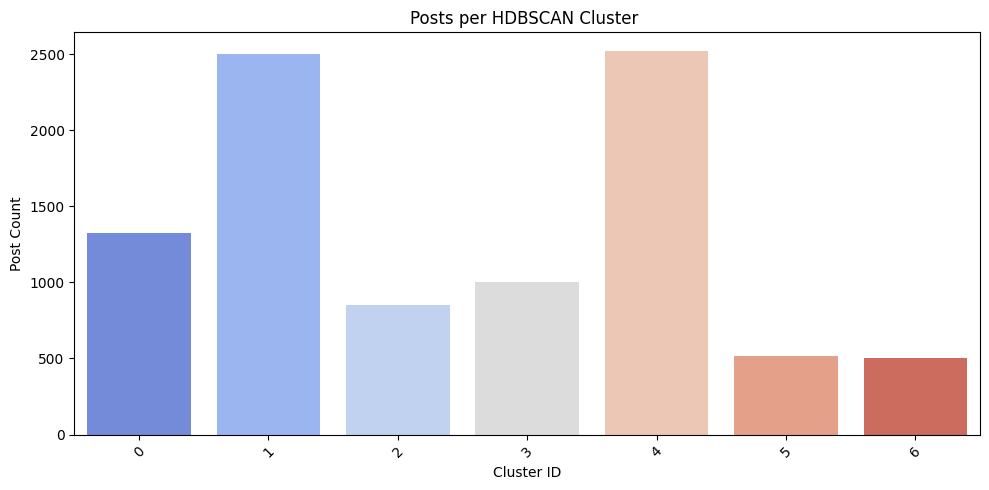

In [94]:
import pandas as pd
import umap
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv(
    'questions_data_clean_stopword_lemma_v3.csv',
    engine='python'
)


# Performing dimensionality reduction of Top2Vec embeddings
embeddings = model.document_vectors
reducer   = umap.UMAP(n_components=5, random_state=42)
emb2d     = reducer.fit_transform(embeddings)

# Clustering with HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=300,
    min_samples=400,
    metric='euclidean',
    cluster_selection_epsilon = 0.4,
    algorithm='best',
    cluster_selection_method='leaf'
)
labels = clusterer.fit_predict(emb2d)

# Attaching Labels
df['HDBSCAN_Cluster'] = labels

# Bar chart of posts per HDBSCAN cluster
plt.figure(figsize=(10,5))
counts = df['HDBSCAN_Cluster'].value_counts().sort_index()[1:]
sns.barplot(
    x=counts.index.astype(str),
    y=counts.values,
    palette='coolwarm'
)
plt.title("Posts per HDBSCAN Cluster ")
plt.xlabel("Cluster ID")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [107]:
len(labels[labels!=-1])

9216

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


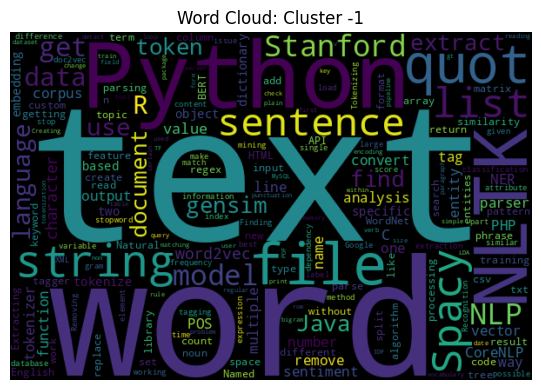

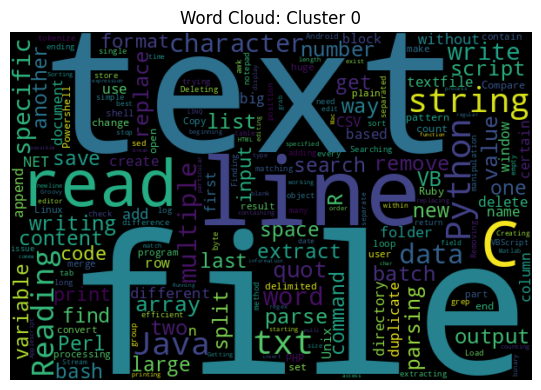

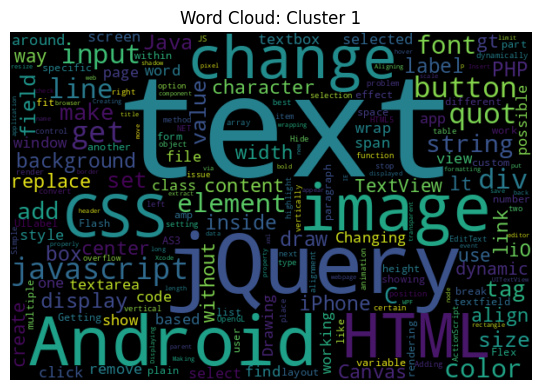

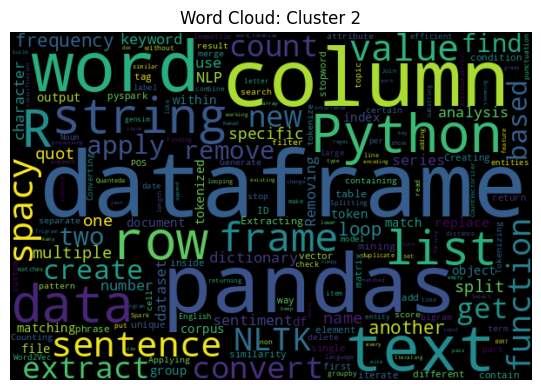

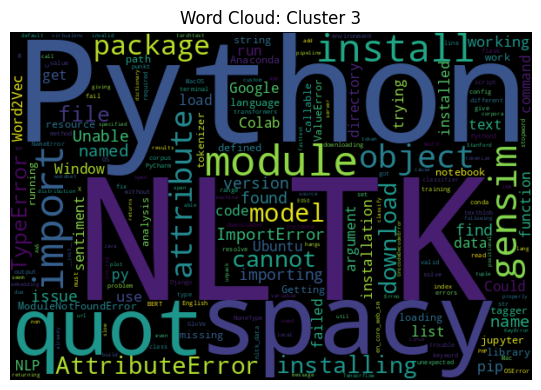

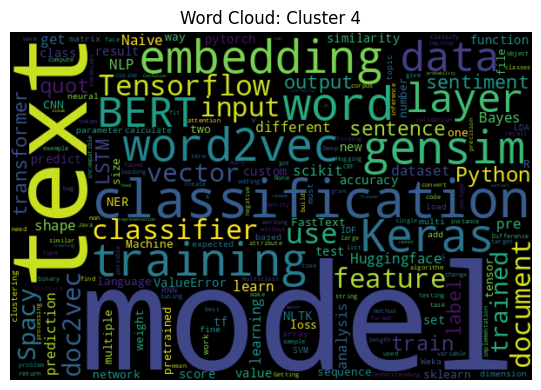

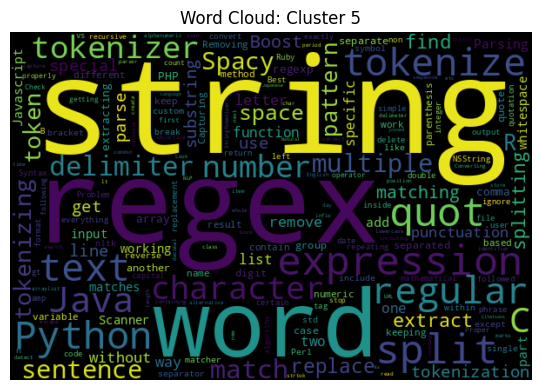

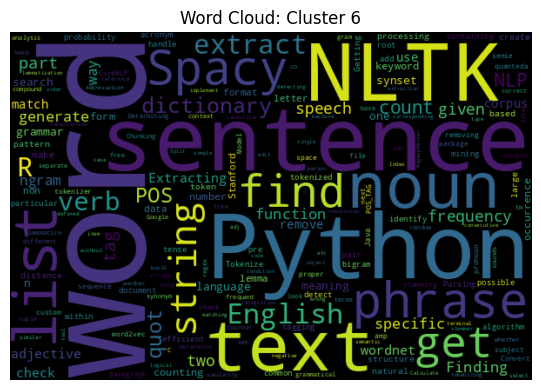

In [99]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))

# Word clouds for each cluster
base_stop = set(STOPWORDS) | {'using','help','question','error'}
for cid, grp in df.groupby('HDBSCAN_Cluster'):
    text = " ".join(grp['Title'].fillna("").tolist())
    wc = WordCloud(width=600, height=400, stopwords=base_stop, collocations=False)
    plt.figure(figsize=(6,4))
    plt.imshow(wc.generate(text), interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud: Cluster {cid}")
    plt.tight_layout()
    plt.show()




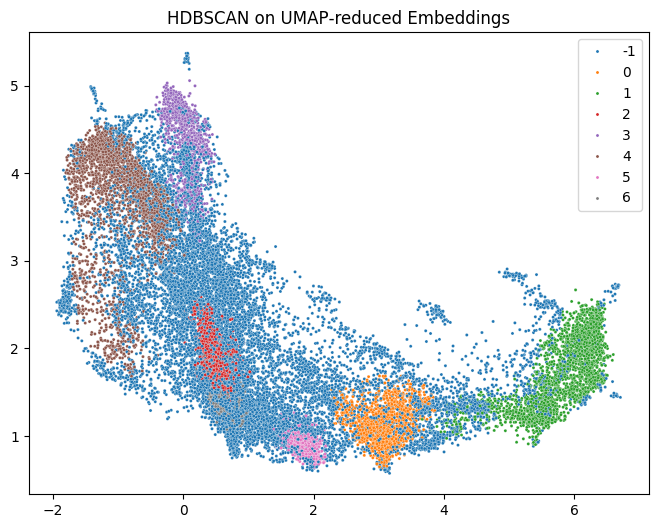

In [98]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=emb2d[:,0], y=emb2d[:,1], hue=labels,
                palette='tab10', s=5, legend='full')
plt.title("HDBSCAN on UMAP‑reduced Embeddings")
plt.show()

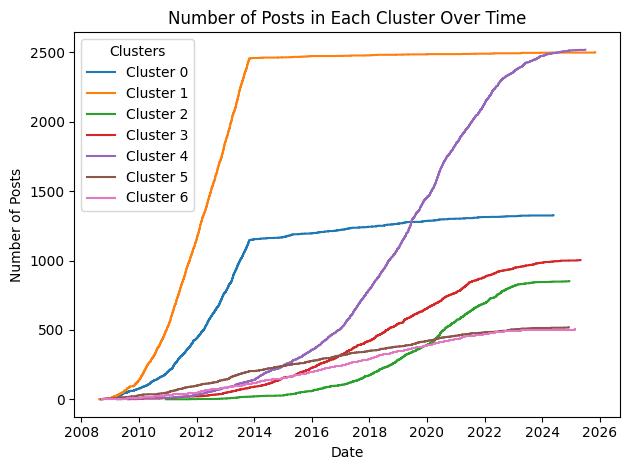

In [108]:
import seaborn as sns
#convert creation time column to pandas datetime type
df['Creation Time'] = pd.to_datetime(df['Creation Time'], format='mixed')
df_sorted=df.sort_values('Creation Time')
#for each cluster, create a time series line
for cluster_id in sorted(df_sorted['HDBSCAN_Cluster'].unique()):
    if cluster_id!=-1:
        cluster_data = df_sorted[df_sorted['HDBSCAN_Cluster'] == cluster_id]

        # Create cumulative count for this cluster
        dates = cluster_data['Creation Time']
        counts = range(1, len(cluster_data) + 1)
        plt.step(dates, counts, where='post', label=f'Cluster {cluster_id}')
plt.title('Number of Posts in Each Cluster Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.legend(title='Clusters')
plt.tight_layout()
plt.show()

In [111]:
clusters = {0:[],1:[],2:[],3:[],4:[], 5:[], 6:[]}

df['HDBSCAN_Cluster'] = [-1] * len(df)
unique_labels = np.unique(labels)
for label in sorted(unique_labels):
    indices = np.where(labels == label)[0]
    num_in_cluster = len(indices)
    example_indices = indices[:]
    for i in example_indices:
        if label!=-1:
            clusters[label].append([df.at[i,'Clean_Text_Stopword_Lemma'],df.at[i,'Title'],df.at[i,'Description']])
        df.at[i, 'HDBSCAN_Cluster'] = label



for class_no, items in sorted(clusters.items()):
    word_freq = {}

    post_index = 0
    for post in items:
        words = post[0].split()

        #count the commonwords
        for word in words:
            if word in word_freq:
                word_freq[word] += 1
            else:
                word_freq[word] = 1

        post_index += 1

    top_10 = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

    print(f"Cluster {class_no} top words:")
    print([words for words,count in top_10])

Cluster 0 top words:
['file', 'text', 'line', 'like', 'txt', 'read', 'would', 'want', 'code', 'using']
Cluster 1 top words:
['text', 'like', 'want', 'would', 'code', 'using', 'image', 'get', 'html', 'way']
Cluster 2 top words:
['column', 'dataframe', 'word', 'text', 'data', 'like', 'row', 'panda', 'want', 'would']
Cluster 3 top words:
['error', 'python', 'nltk', 'code', 'using', 'spacy', 'package', 'file', 'install', 'following']
Cluster 4 top words:
['model', 'word', 'using', 'data', 'text', 'use', 'training', 'code', 'like', 'document']
Cluster 5 top words:
['string', 'regex', 'like', 'word', 'quot', 'using', 'want', 'text', 'split', 'would']
Cluster 6 top words:
['word', 'sentence', 'like', 'would', 'text', 'using', 'list', 'want', 'get', 'nltk']


In [112]:
print("Examples of Topic by Cluster")
for cid, grp in df.groupby('HDBSCAN_Cluster'):
    print(f"\n Cluster {cid} ({len(grp)} posts)")
    for title in grp['Title'].head(5):
        print(" •", title)


Examples of Topic by Cluster

 Cluster -1 (14073 posts)
 • Natural language date/time parser for .NET?
 • Vista speech recognition in multiple languages
 • How do you implement a &quot;Did you mean&quot;?
 • Is there an algorithm that tells the semantic similarity of two phrases
 • How to read values from numbers written as words?

 Cluster 0 (1325 posts)
 • The lines that stand out in a file, but aren&#39;t exact duplicates
 • how do i script hunpos through text files?
 • Trouble conceptualizing how to have LDA-Ruby read multiple .txt files
 • replace conjunctions from a txt file by end of line java
 • How to extract a text string using bash (or python on mac)

 Cluster 1 (2498 posts)
 • Integrating my program with a web2.0 website
 • How to detect nonsensical text in PHP?
 • Get the word under the mouse cursor in Windows
 • what log value to use for Kullback leibler divergence implementation?
 • Shorten string to just a product name

 Cluster 2 (851 posts)
 • remove duplicates matche

In [104]:
from sklearn.metrics import silhouette_score
import numpy as np
filtered_embeddings = embeddings[labels != -1]
filtered_labels = labels[labels != -1]

unique_clusters = np.unique(filtered_labels)

silhouette_avg = silhouette_score(filtered_embeddings, filtered_labels, metric='cosine')

print(round(silhouette_avg,2))

0.13


In [109]:
import html
import random
random.seed(123)

data = clusters

#HTML table structure with CSS for basic styling
html_output = """
<style>
  table {
    border-collapse: collapse;
    width: 100%;
    font-family: sans-serif;
  }
  th, td {
    border: 1px solid #ddd;
    padding: 8px;
    text-align: left;
    vertical-align: top; /* Align content to the top */
  }
  th {
    background-color: #f2f2f2;
  }
  tr:nth-child(even) {
    background-color: #f9f9f9;
  }
  td[rowspan] {
    font-weight: bold;
    vertical-align: top; /* Align content to the top */
    text-align: center;     /* Center the key horizontally */
  }
  a {
    color: #0066cc;
    text-decoration: none;
  }
  a:hover {
    text-decoration: underline;
  }
</style>
<table>
  <thead>
    <tr>
      <th>Cluster</th>
      <th>Title</th>
      <th>URL</th>
    </tr>
  </thead>
  <tbody>
"""
#start table
for key, items in sorted(data.items()):
    sample_size = min(10, len(items)) #max 10 samples

    if sample_size > 0:
        sample = random.sample(items, sample_size) #random 10 examples
    else:
        sample = []

    rows= len(sample)
    for i, item in enumerate(sample):
        title = item[0] if len(item) > 0 else "N/A"
        url = item[1] if len(item) > 1 else "#"
        escaped_title = html.escape(title)
        escaped_url = html.escape(url)

        html_output += "<tr>"
        if i == 0:
            html_output += f'<td rowspan="{rows}">{key}</td>'
        html_output += f'<td>{escaped_title}</td>'
        html_output += f'<td><a href="{escaped_url}" target="_blank">{escaped_url}</a></td>'
        html_output += "</tr>\n"

html_output += """
  </tbody>
</table>
"""

try:
    with open('data_table_sampled.html', 'w', encoding='utf-8') as f:
        f.write(html_output)
    print("HTML table successfully saved to data_table_sampled.html")
except Exception as e:
    print(f"An error occurred while writing the file: {e}")

HTML table successfully saved to data_table_sampled.html
